In [1]:
import pickle
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

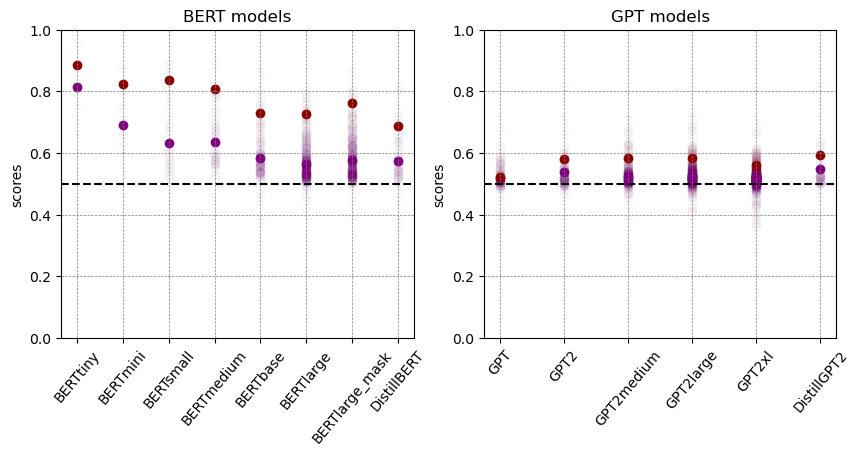

In [13]:
"""
Visualization of level of symmetry between different models 
(across layers and heads)
"""

plt.figure(figsize=(10,4))

## BERT models
plt.subplot(1,2,1)

# get scores for BERT models calculated on each head
with open('../data/fig_scores/BERTmodels.pkl', 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-2].flatten()**2 for key in list(models.keys())]
names = list(models.keys())

for i, model in enumerate(SList):
    
    plt.scatter(i*np.ones(SList[i].size),SList[i],color='purple',alpha=.01)
    plt.scatter(i,(SList[i].flatten()).mean(),color='purple')

# get scores for BERT models calculated on the whole M matrix
with open('../data/fig_scores/BERTFullmodels.pkl', 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-2].flatten()**2 for key in list(models.keys())]
names = list(models.keys())

for i, model in enumerate(SList):
    
    plt.scatter(i*np.ones(SList[i].size),SList[i],color='darkred',alpha=.01)
    plt.scatter(i,(SList[i].flatten()).mean(),color='darkred')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('BERT models')
plt.ylabel('scores')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation=50)
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')

## GPT models
plt.subplot(1,2,2)

# get scores for BERT models calculated on each head
with open('../data/fig_scores/GPTmodels.pkl', 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-2].flatten()**2 for key in list(models.keys())]
names = list(models.keys())

for i, model in enumerate(SList):
    
    plt.scatter(i*np.ones(SList[i].size),SList[i],color='purple',alpha=.01)
    plt.scatter(i,(SList[i].flatten()).mean(),color='purple')

# get scores for BERT models calculated on the whole M matrix
with open('../data/fig_scores/GPTFullmodels.pkl', 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-2].flatten()**2 for key in list(models.keys())]
names = list(models.keys())

for i, model in enumerate(SList):
    
    plt.scatter(i*np.ones(SList[i].size),SList[i],color='darkred',alpha=.01)
    plt.scatter(i,(SList[i].flatten()).mean(),color='darkred')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('GPT models')
plt.ylabel('scores')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation=50)
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')

In [40]:
# get scores for BERT-base 
with open('../data/fig_scores/BERTmodels.pkl', 'rb') as file:
    models = pickle.load(file)
SBERT = models['BERTbase'][-2]**2

with open('../data/fig_scores/BERTFullmodels.pkl', 'rb') as file:
    models = pickle.load(file)
SBERTFull = models['BERTbase'][-2]**2

# get scores for GPT-1 
with open('../data/fig_scores/GPTmodels.pkl', 'rb') as file:
    models = pickle.load(file)
SGPT = models['GPT'][-2]**2

with open('../data/fig_scores/GPTFullmodels.pkl', 'rb') as file:
    models = pickle.load(file)
SGPTFull = models['GPT'][-2]**2

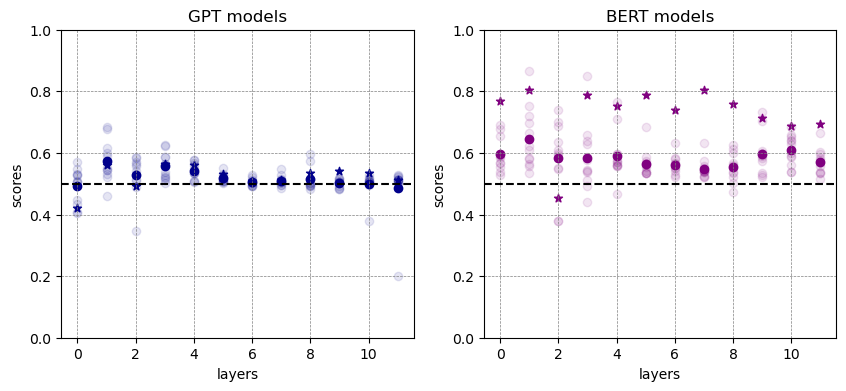

In [51]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

plt.scatter(np.arange(SGPTFull.shape[0]),SGPTFull,color='darkblue',marker='*')

for layer in range(SGPT.shape[0]):
    
    plt.scatter(layer*np.ones(SGPT.shape[1]),SGPT[layer,:],color='darkblue',alpha=.1)
    plt.scatter(layer,SGPT[layer,:].mean(),color='darkblue')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('GPT models')
plt.ylabel('scores')
plt.xlabel('layers')
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')

plt.subplot(1,2,2)

plt.scatter(np.arange(SBERTFull.shape[0]),SBERTFull,color='purple',marker='*')

for layer in range(SBERT.shape[0]):
    
    plt.scatter(layer*np.ones(SBERT.shape[1]),SBERT[layer,:],color='purple',alpha=.1)
    plt.scatter(layer,SBERT[layer,:].mean(),color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('BERT models')
plt.ylabel('scores')
plt.xlabel('layers')
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')